In [17]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('/dfs/scratch0/vschen/metal')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def visualize_data(X, Y, C, L):
    # show data by class
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 2, 1)
    plt.title('Data by Classes')
    plt.scatter(X[Y==1,0], X[Y==1,1], label="$y=+1$", c='C1')
    plt.scatter(X[Y==-1,0], X[Y==-1,1], label="$y=-1$", c='C0')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()

    # show data by slice
    plt.subplot(2, 2, 2)
    plt.title('Data by Slice')
    plt.scatter(X[C==0,0], X[C==0,1], label="$S_0$", c='C0')
    plt.scatter(X[C==1,0], X[C==1,1], label="$S_1$", c='C1')
    plt.scatter(X[C==2,0], X[C==2,1], label="$S_2$", c='C2')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()

    # LFs targeting slices
    plt.subplot(2, 2, 3)
    plt.title('LFs ($\lambda_i$) Targeting Slices ($S_i$)')
    plt.scatter(X[L[:,0]!=0,0], X[L[:,0]!=0,1], label="$\lambda_0$", c='C0')
    plt.scatter(X[L[:,1]!=0,0], X[L[:,1]!=0,1], label="$\lambda_1$", c='C1')
    plt.scatter(X[L[:,2]!=0,0], X[L[:,2]!=0,1], label="$\lambda_2$", c='C2')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.title('$\lambda_2$ accuracy')
    plt.scatter(X[L[:,2]==1,0], X[L[:,2]==1,1], label="$\lambda_2=+1$", s=0.1, c='C1')
    plt.scatter(X[L[:,2]==-1,0], X[L[:,2]==-1,1], label="$\lambda_2=-1$", s=0.1, c='C0')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()
    plt.show()


## Simulate

target op: 0.1, found op: 0.10906666666666667, found r: 0.8000000000000002


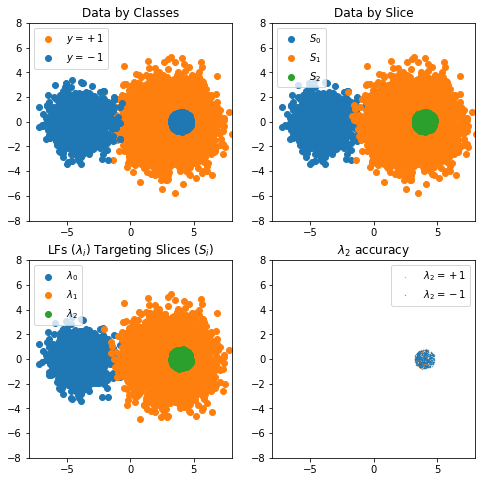

{'N': 10000,
 'mus': [array([-4,  0]), array([3, 0])],
 'labels': [-1, 1],
 'props': [0.25, 0.75],
 'variances': [1, 2],
 'head_config': {'h': 4, 'k': 0, 'r': 1, 'slice_label': -1},
 'accs': [0.75, 0.75, 0.75],
 'covs': [0.75, 0.75, 0.75]}

In [41]:
from simulate import data_config as config
from synthetics_utils import generate_synthetic_data

# Setting 1: Separable case
# config = {
#     # data generation
#     "N": 10000, # num data points
#     "mus": [
#         np.array([-6, 4]), # Mode 1: Y = -1
#         np.array([3, 4]), # Mode 2: Y = 1,
#         np.array([6, -3])
#     ],
#     "labels": [-1, 1, -1], # labels of each slice
#     "props": [0.45, 0.45, 0.1], # proportion of data in each mode
#     "variances": [0.5, 0.5, 0.5], # proportion of data in each mode
#     "head_config": None,

#     "accs": np.array([0.999, 0.999, 0.999]), # default accuracy of LFs
#     "covs": np.array([1., 1., 1.]), # default coverage of LFs
# }

# Setting 2: Donut
config['mus'] = [
    np.array([-4, 0]), # Mode 1: Y = -1
    np.array([3, 0]), # Mode 2: Y = 1,
]
config['accs'] = [0.75, 0.75, 0.75]
config['covs'] = [0.75, 0.75, 0.75]
X, Y, C, L = generate_synthetic_data(config, 'op', 0.1)
visualize_data(X, Y, C, L)
config

In [ ]:
# %%time
from simulate import simulate, data_config, experiment_config

experiment_config['x_var'] = 'op'
experiment_config['x_range'] = np.linspace(0, 0.5, 5)
experiment_config['"tensorboard_logdir"] = f"./run_logs/{experiment}"

baseline_scores, manual_scores, attention_scores = \
    simulate(config, generate_synthetic_data, experiment_config)


  0%|          | 0/1 [00:00<?, ?it/s]

Simulating: None=0.0
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.021	Dev accuracy: 0.874
Saving model at iteration 5 with best score 0.934
Saving model at iteration 6 with best score 0.941
Saving model at iteration 8 with best score 0.973
[E:10]	Train Loss: 0.021	Dev accuracy: 0.924
Saving model at iteration 13 with best score 0.974
Saving model at iteration 15 with best score 0.980
[E:19]	Train Loss: 0.021	Dev accuracy: 0.978
Restoring best model from iteration 15 with score 0.980
Finished Training
Accuracy: 0.980
        y=1    y=2   
 l=1   1248    25    
 l=2    16     711   
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.025	Dev accuracy: 0.847
Saving model at iteration 5 with best score 0.932
Saving model at iteration 6 with best score 0.938
Saving model at iteration 7 with best score 0.956
Saving model at iteration 8 with best score 0.974
[E:10]	Train Loss: 0.024	Dev accuracy: 0.896



100%|██████████| 1/1 [01:04<00:00, 64.04s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

Simulating: None=0.25
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.021	Dev accuracy: 0.860
Saving model at iteration 5 with best score 0.969
[E:10]	Train Loss: 0.021	Dev accuracy: 0.913
Saving model at iteration 13 with best score 0.977
Saving model at iteration 14 with best score 0.979
[E:19]	Train Loss: 0.021	Dev accuracy: 0.971
Restoring best model from iteration 14 with score 0.979
Finished Training
Accuracy: 0.979
        y=1    y=2   
 l=1   1195    20    
 l=2    23     762   
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.025	Dev accuracy: 0.728
Saving model at iteration 5 with best score 0.899
Saving model at iteration 6 with best score 0.900
Saving model at iteration 7 with best score 0.910
Saving model at iteration 8 with best score 0.938
Saving model at iteration 10 with best score 0.951
[E:10]	Train Loss: 0.024	Dev accuracy: 0.951
Saving model at iteration 11 with best score 0.9


100%|██████████| 1/1 [01:02<00:00, 62.28s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

Simulating: None=0.5
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.021	Dev accuracy: 0.841
Saving model at iteration 5 with best score 0.931
Saving model at iteration 8 with best score 0.965
Saving model at iteration 10 with best score 0.965
[E:10]	Train Loss: 0.021	Dev accuracy: 0.965
Saving model at iteration 11 with best score 0.979
Saving model at iteration 15 with best score 0.982
Saving model at iteration 16 with best score 0.986
[E:19]	Train Loss: 0.021	Dev accuracy: 0.981
Restoring best model from iteration 16 with score 0.986
Finished Training
Accuracy: 0.986
        y=1    y=2   
 l=1   1210     1    
 l=2    27     762   
No checkpoints will be saved in the first checkpoint_runway=5 iterations.
[E:0]	Train Loss: 0.025	Dev accuracy: 0.858
Saving model at iteration 5 with best score 0.937
Saving model at iteration 7 with best score 0.938
Saving model at iteration 8 with best score 0.949
Saving model at iteration 9 with best score

In [43]:
def get_slice_scores(scores, key=0.9):
    S0 = np.mean([s['S0'] for s in scores[key]])
    S1 = np.mean([s['S1'] for s in scores[key]])
    S2 = np.mean([s['S2'] for s in scores[key]])
    overall = np.mean([s['overall'] for s in scores[key]])    
    return {'S0':S0, 'S1':S1, 'S2':S2, 'overall':overall}

In [44]:
for k in baseline_scores.keys():
    print (k)
    print ('base:', get_slice_scores(baseline_scores, k))
    print ('manual:', get_slice_scores(manual_scores, k))
    print ('attention:', get_slice_scores(attention_scores, k))

0.0
base: {'S0': 1.0, 'S1': 1.0, 'S2': 1.0, 'overall': 1.0}
manual: {'S0': 1.0, 'S1': 1.0, 'S2': 1.0, 'overall': 1.0}
attention: {'S0': 1.0, 'S1': 0.9993386243386243, 'S2': 1.0, 'overall': 0.9995}
0.125
base: {'S0': 1.0, 'S1': 0.9863842662632375, 'S2': 0.8544600938967136, 'overall': 0.9755}
manual: {'S0': 1.0, 'S1': 0.9803328290468987, 'S2': 0.9154929577464789, 'overall': 0.978}
attention: {'S0': 1.0, 'S1': 0.983358547655068, 'S2': 0.9107981220657277, 'overall': 0.9795}
0.25
base: {'S0': 0.998046875, 'S1': 0.9633699633699634, 'S2': 0.9545454545454546, 'overall': 0.9705}
manual: {'S0': 0.998046875, 'S1': 0.9652014652014652, 'S2': 0.9419191919191919, 'overall': 0.969}
attention: {'S0': 0.99609375, 'S1': 0.9716117216117216, 'S2': 0.9065656565656566, 'overall': 0.965}
0.375
base: {'S0': 0.9979423868312757, 'S1': 0.9678899082568807, 'S2': 0.985981308411215, 'overall': 0.981}
manual: {'S0': 0.9979423868312757, 'S1': 0.911697247706422, 'S2': 0.9688473520249221, 'overall': 0.951}
attention: {'

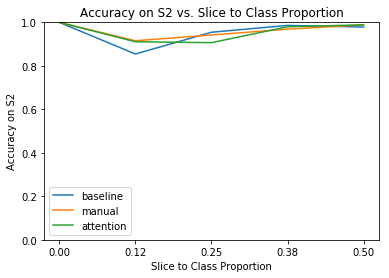

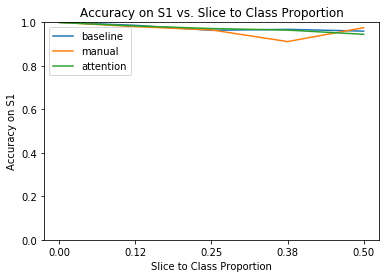

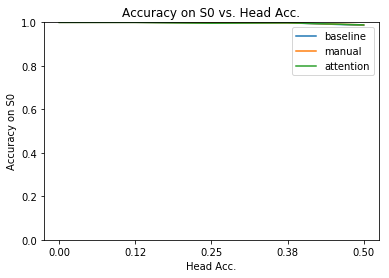

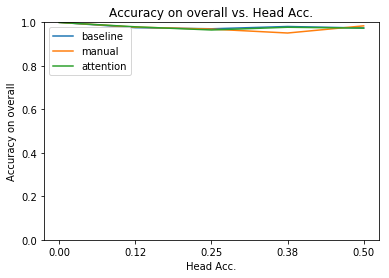

In [45]:
results = {
    'baseline': dict(baseline_scores),
    'manual': dict(manual_scores),
    'attention': dict(attention_scores)
}

from synthetics_utils import plot_slice_scores
plot_slice_scores(results, 'S2', xlabel='Slice to Class Proportion')
plt.show()
plot_slice_scores(results, 'S1', xlabel='Slice to Class Proportion')
plt.show()
plot_slice_scores(results, 'S0', xlabel='Head Acc.')
plt.show()
plot_slice_scores(results, 'overall', xlabel='Head Acc.')